In [66]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import isbnlib
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance # To calculate distances
from IPython.display import Image
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings("ignore")
print('Libraries imported!')  

Libraries imported!


Combining the data to make the data framne

In [67]:
cities=["Mumbai","Chennai","Kolkata","New Delhi","Lucknow","Hyderabad","Jammu","Dehradun","Bhopal","Bangalore","Ranchi","Patna","Indore","Amritsar","Pune","Ahmedabad","Aurangabad","Varanasi","Jaipur","Chandigarh","Guwahati","Mysore","Thiruvananthapuram","Visakhapatnam","Coimbatore","Surat","Nagpur","Kota","Ludhiana","Allahabad"]


In [105]:
data={
      'AQI':[54.96453900709219, 1.4184397163120568, 0.0, 92.5531914893617, 56.38297872340425, 34.751773049645394, 2.8368794326241136, 6.382978723404255, 100.0, 6.028368794326241, 81.91489361702128, 7.801418439716312, 68.79432624113475, 54.25531914893617, 59.21985815602837, 17.02127659574468, 50.35460992907801, 8.865248226950355, 77.6595744680851, 34.751773049645394, 1.773049645390071, 7.446808510638298, 2.4822695035460995, 11.347517730496454, 0.0, 59.9290780141844, 53.191489361702125, 99.29078014184397, 62.76595744680851, 29.78723404255319],
      'Literacy Rate' : [66.07706885660146, 68.91977258370191, 44.47252053063807, 52.55843335439045, 20.404295641187645, 25.205306380290647, 68.6670878079596, 57.422615287428954, 26.53190145293748, 59.633607075173714, 51.16866708780802, 25.90018951358186, 41.69298799747321, 31.080227416298182, 65.00315855969683, 56.98041692988004, 42.70372710044224, 0.0, 25.64750473783956, 45.16740366392929, 77.0688566013898, 53.06380290587496, 100.0, 15.919140871762544, 75.99494630448517, 54.45356917245739, 79.91156032849025, 22.29943145925459, 41.0612760581175, 34.68098547062546],
      'Population Density': [30.664659738600246, 4.217206331732653, 8.439250067765936, 100.0, 0.4273195354271325, 12.001047298613031, 0.0034738769785607406, 0.06746078603615056, 0.2471203563789827, 1.4840356048707184, 0.07758070905187249, 0.19963110043297572, 0.19107090173366614, 0.1594113078531271, 0.07337633149736396, 0.26299966050219215, 0.0, 0.2982282528056325, 0.10187165897909362, 3.2602602443537743, 1.7112556435825876, 0.046505393934107284, 0.12737566401176958, 0.6342059490789641, 0.08217387498202089, 0.3874257162128608, 0.09019367804164631, 0.07038517187806168, 0.16238887302765628, 0.07461842313770209],
      'Crime Rate': [47.49631811487482, 28.092783505154628, 51.47275405007363, 100.0, 52.945508100147265, 40.16936671575846, 33.76288659793813, 10.309278350515456, 44.21944035346097, 78.46097201767304, 70.61855670103093, 70.58173784977907, 62.73932253313698, 12.113402061855668, 36.41384388807067, 0.0, 24.88954344624447, 15.574374079528708, 9.131075110456543, 38.991163475699544, 48.122238586156094, 65.57437407952871, 24.85272459499264, 16.642120765832093, 20.287187039764355, 7.142857142857135, 23.269513991163453, 24.11634756995581, 82.21649484536083, 23.600883652430035],
      'Safety Index': [52.50368188512519, 71.90721649484537, 48.52724594992637, 0.0, 47.054491899852735, 59.83063328424154, 66.23711340206188, 89.69072164948454, 55.78055964653903, 21.539027982326957, 29.381443298969064, 29.418262150220926, 37.26067746686303, 87.88659793814436, 63.58615611192933, 100.0, 75.11045655375553, 84.42562592047129, 90.86892488954348, 61.00883652430045, 51.877761413843906, 34.42562592047129, 75.14727540500736, 83.35787923416791, 79.71281296023565, 92.85714285714286, 76.73048600883655, 75.8836524300442, 17.78350515463917, 76.39911634756996],
      'Property Price/Income':[71.87760778859527, 12.545201668984705, 15.104311543810853, 15.326842837273997, 8.150208623087622, 2.94853963838665, 57.02364394993047, 56.35605006954104, 30.625869262865095, 5.396383866481226, 16.63421418636996, 45.78581363004173, 11.376912378303203, 4.255910987482616, 5.7858136300417256, 10.097357440890125, 8.178025034770517, 4.116828929068152, 26.759388038942983, 9.707927677329623, 6.703755215577193, 0.0, 6.342141863699584, 12.600834492350488, 14.770514603616133, 10.9874826147427, 17.413073713490963, 1.335187760778861, 100.0, 6.036161335187761],
      'Average Rainfall': [97.65765765765767, 69.41441441441441, 81.08108108108108, 35.585585585585584, 44.0990990990991, 36.171171171171174, 31.98198198198198, 100.0, 50.36036036036036, 40.765765765765764, 64.32432432432432, 50.27027027027027, 47.83783783783784, 34.234234234234236, 33.37837837837838, 35.54054054054054, 33.648648648648646, 46.08108108108108, 27.432432432432428, 47.88288288288288, 77.56756756756756, 35.99099099099099, 0.0, 0.0, 28.82882882882883, 51.306306306306304, 49.27927927927928, 34.5045045045045, 33.01801801801802, 43.15315315315315],
      'Traffic': [87.98877274487032, 58.4736740224545, 92.1215640727836, 100.0, 48.257839721254356, 49.19667053813395, 8.17363530778165, 39.40185830429733, 24.395083236546654, 84.82384823848238, 25.958188153310104, 8.449477351916373, 30.395857530003873, 23.05458768873403, 58.57530003871467, 36.27564847077043, 17.54258614014712, 54.3892760356175, 60.017421602787465, 29.62640340689121, 7.834881920247773, 0.0, 51.58246225319396, 33.749516066589244, 59.60123886953156, 9.073751451800232, 6.141114982578396, 31.475029036004642, 7.147696476964768, 81.2862950058072],
      'Unemployment Rate': [7.393436439079593, 7.280271595624295, 15.42814032440588, 34.13806110901547, 5.846850245190497, 23.651452282157674, 76.53715579026782, 6.8443773837964725, 0.5281026027914001, 3.734439834024894, 49.000377216144855, 53.753300641267465, 0.5281026027914001, 25.08487363259148, 7.393436439079593, 0.0, 7.393436439079593, 5.846850245190497, 100.0, 38.28743870237647, 23.93059222934742, 3.734439834024894, 14.673708034703884, 16.93700490380988, 7.280271595624295, 0.0, 7.393436439079593, 100.0, 25.08487363259148, 5.846850245190497],
      'Life Expectancy': [68.93203883495146, 67.96116504854362, 63.10679611650478, 100.0, 0.0, 40.77669902912619, 83.49514563106794, 48.543689320388296, 13.59223300970878, 37.864077669902926, 36.89320388349521, 34.95145631067966, 13.59223300970878, 69.90291262135916, 68.93203883495146, 44.660194174757315, 68.93203883495146, 0.0, 33.009708737864095, 52.42718446601942, 18.446601941747605, 37.864077669902926, 93.20388349514562, 45.63106796116503, 67.96116504854362, 44.660194174757315, 68.93203883495146, 33.009708737864095, 69.90291262135916, 0.0],
      'Factories': [65.7216160883199, 100.0, 24.3605359317905, 7.797963044548682, 41.29369995076062, 38.927618109726076, 3.7577422447974707, 7.046414595589188, 11.716381164640941, 36.07173400367999, 6.802809236271283, 8.238525928421488, 11.716381164640941, 33.280638557026975, 65.7216160883199, 73.15676264026744, 65.7216160883199, 41.29369995076062, 24.474563972322287, 0.0, 12.817788374322959, 36.07173400367999, 19.555808951201183, 43.21144426879519, 100.0, 73.15676264026744, 65.7216160883199, 24.474563972322287, 33.280638557026975, 41.29369995076062],
      'Workers Engaged': [0.24449667091183208, 0.18641264327258938, 0.22709061436435385, 0.0, 0.19326447192177584, 0.09664443076839568, 100.0, 0.6023170651431536, 0.28179991813248095, 0.22716955869633726, 0.20261513408192924, 0.022023972274389517, 0.28179991813248095, 0.09146524190963551, 0.24449667091183208, 0.20787204584832522, 0.24449667091183208, 0.19326447192177584, 0.15055811051827273, 0.03931622891924051, 0.09186707037443921, 0.22716955869633726, 0.055791180964035784, 0.031624922405321644, 0.18641264327258938, 0.20787204584832522, 0.24449667091183208, 0.15055811051827273, 0.09146524190963551, 0.19326447192177584],
      'Food Prices': [58.561948265694994, 60.217921298374385, 48.7680317552522, 60.54555136024785, 26.884367931419924, 66.098319823269, 37.83148065024336, 25.423344687068184, 26.77743159154719, 100.0, 0.0, 59.35780987334864, 28.491493500206833, 40.57419973771992, 59.58356436863552, 61.757496545472144, 6.8003590948696955, 14.36225455249562, 37.61562766790766, 40.823057763226224, 52.002525985970664, 28.173984984905694, 40.6135857559035, 54.35556553041305, 50.81456446545032, 56.3096841197335, 41.8143092264498, 28.234714264339587, 40.04303857629446, 16.362360168633767],
      'HealthCare Index': [79.97225593896304, 87.75793306745274, 68.5104907230796, 80.1456563204439, 77.24986994971388, 80.73521761747877, 35.21761747875845, 100.0, 63.429859545690995, 81.23807872377317, 45.03207907057396, 62.45881740939829, 56.910005202011426, 87.49783249523148, 77.75273105600833, 80.5618172359979, 57.39552627015778, 93.01196462632217, 93.96566672446679, 76.07074735564419, 77.28455002601005, 71.68371770417895, 75.20374544823999, 87.22039188486214, 87.30709207560255, 82.3998612796948, 80.2323565111843, 69.84567366048205, 77.09380960638113, 0.0],
      'Pollution Index': [81.74703357737944, 58.773037111840445, 69.57838929563242, 100.0, 67.38197424892704, 63.03963645544054, 40.89876293865186, 47.26079272910881, 18.606412522090373, 78.4397879323403, 28.47765715728352, 96.56652360515021, 23.100227215349655, 83.86771017419844, 52.41100732138351, 53.85003786922494, 59.60616006059076, 93.20878566018683, 25.347134561979296, 0.0, 62.660944206008566, 13.582428679626346, 12.320121181519808, 37.56627114365058, 30.371118404443326, 11.688967432466537, 25.70058066144913, 49.002777076495825, 89.8258015652613, 95.27896995708154]
      }


In [107]:
df = pd.DataFrame(data)
df  

,AQI,Literacy Rate,Population Density,Crime Rate,Safety Index,Property Price/Income,Average Rainfall,Traffic,Unemployment Rate,Life Expectancy,Factories,Workers Engaged,Food Prices,HealthCare Index,Pollution Index
0,54.964539,66.077069,30.664660,47.496318,52.503682,71.877608,97.657658,87.988773,7.393436,68.932039,65.721616,0.244497,58.561948,79.972256,81.747034
1,1.418440,68.919773,4.217206,28.092784,71.907216,12.545202,69.414414,58.473674,7.280272,67.961165,100.000000,0.186413,60.217921,87.757933,58.773037
2,0.000000,44.472521,8.439250,51.472754,48.527246,15.104312,81.081081,92.121564,15.428140,63.106796,24.360536,0.227091,48.768032,68.510491,69.578389
3,92.553191,52.558433,100.000000,100.000000,0.000000,15.326843,35.585586,100.000000,34.138061,100.000000,7.797963,0.000000,60.545551,80.145656,100.000000
4,56.382979,20.404296,0.427320,52.945508,47.054492,8.150209,44.099099,48.257840,5.846850,0.000000,41.293700,0.193264,26.884368,77.249870,67.381974
5,34.751773,25.205306,12.001047,40.169367,59.830633,2.948540,36.171171,49.196671,23.651452,40.776699,38.927618,0.096644,66.098320,80.735218,63.039636
6,2.836879,68.667088,0.003474,33.762887,66.237113,57.023644,31.981982,8.173635,76.537156,83.495146,3.757742,100.000000,37.831481,35.217617,40.898763
7,6.382979,57.422615,0.067461,10.309278,89.690722,56.356050,100.000000,39.401858,6.844377,48.543689,7.046415,0.602317,25.423345,100.000000,47.260793
8,100.000000,26.531901,0.247120,44.219440,55.780560,30.625869,50.360360,24.395083,0.528103,13.592233,11.716381,0.281800,26.777432,63.429860,18.606413
9,6.028369,59.633607,1.484036,78.460972,21.539028,5.396384,40.765766,84.823848,3.734440,37.864078,36.071734,0.227170,100.000000,81.238079,78.439788


In [71]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
AQI                      0
Literacy Rate            0
Population Density       0
Crime Rate               0
Safety Index             0
Property Price/Income    0
Average Rainfall         0
Traffic                  0
Unemployment Rate        0
Life Expectancy          0
Factories                0
Workers Engaged          0
Food Prices              0
HealthCare Index         0
Pollution Index          0
dtype: int64


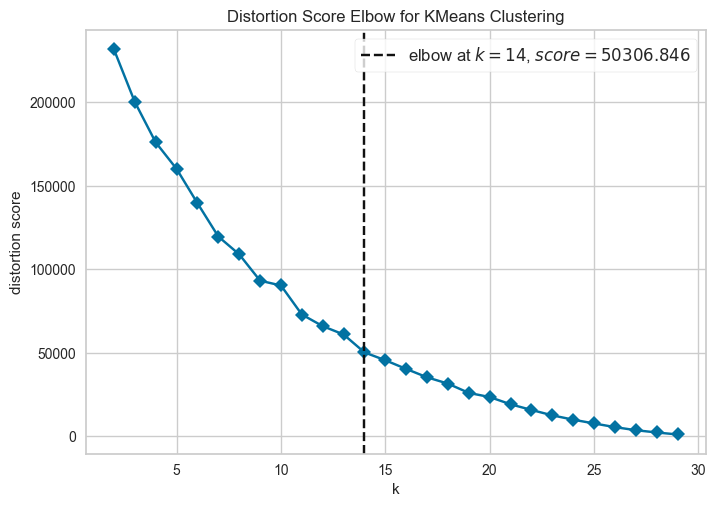

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.

visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(df)
# Finalize and render figure
visualizer.show()

In [73]:
kmeans = KMeans(n_clusters = 12, init = 'k-means++', n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

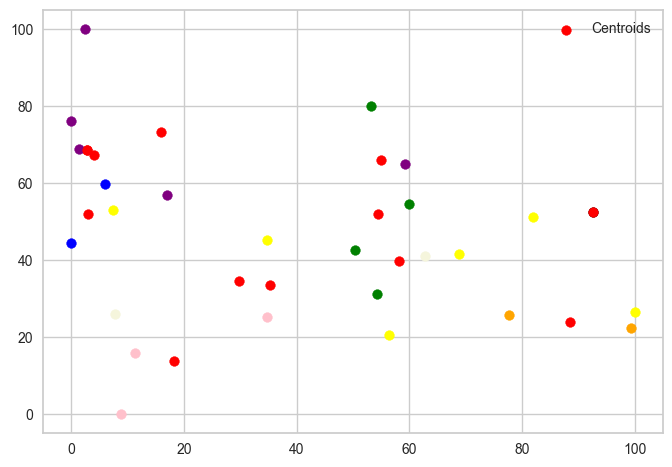

In [74]:
colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown"]
for i in range (0,9):
    filtered_label0=df[y_kmeans == i].iloc[:,:-1].values
    plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], c = colors[i])
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'red', label = 'Centroids')
# k_means.cluster_centers
plt.legend()

In [75]:
centroids  = kmeans.cluster_centers_  #means of shape [10,] 
for x in centroids:
    print(x)
# print(np.size(centroids))
# kmeans==0


[2.83687943e+00 6.86670878e+01 3.47387698e-03 3.37628866e+01
 6.62371134e+01 5.70236439e+01 3.19819820e+01 8.17363531e+00
 7.65371558e+01 8.34951456e+01 3.75774224e+00 1.00000000e+02
 3.78314807e+01 3.52176175e+01 4.08987629e+01]
[54.43262411 52.037271    0.15925768 16.85382916 83.14617084 10.20862309
 42.11711712 13.95301007  9.96793663 63.10679612 59.47015834  0.19708266
 36.37463804 76.88139414 45.21585458]
[ 3.0141844  52.0530638   4.96164284 64.96686303 35.03313697 10.25034771
 60.92342342 88.47270616  9.58129008 50.48543689 30.21613497  0.22713009
 74.38401588 74.87428472 74.00908861]
[58.21513002 39.67150979  0.70830952 55.84806087 44.15193913 12.74918869
 48.41591592 26.43889534 16.3208852  25.72815534 17.93350092  0.20432754
 25.19172263 65.06271314 25.19144997]
[18.321513   13.70814908  4.3111605  24.12862052 75.87137948  6.55540102
 27.41741742 45.77848755 15.47843581 28.802589   41.14425411  0.10717794
 44.9387133  86.98919138 64.60489775]
[ 92.55319149  52.55843335 100.   

In [76]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
# import numpy as np
# import pandas as pd
from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
# from google.colab import files
from IPython.display import Image
import scipy.cluster.hierarchy as sch
import sklearn


In [77]:
sklearn.metrics.davies_bouldin_score(df, y_kmeans)

0.9180082594585953

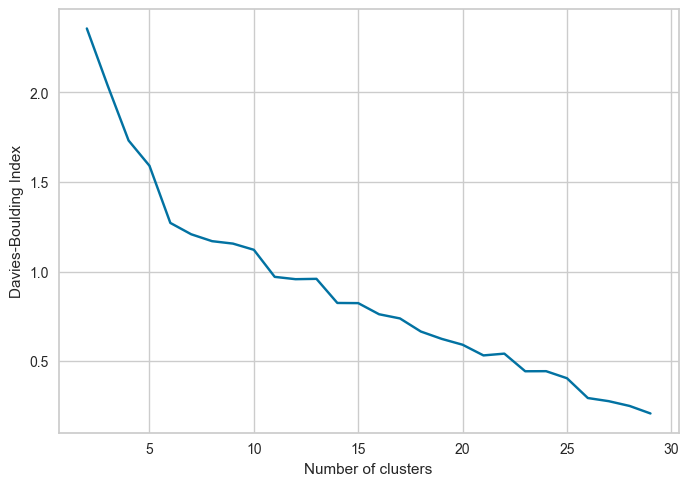

In [78]:
results = {}

for i in range(2,30):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(df)
    db_index = sklearn.metrics.davies_bouldin_score(df, labels)
    results.update({i: db_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()



In [41]:
!pip3 install yellowbrick

In [42]:
import yellowbrick as yellowbrick

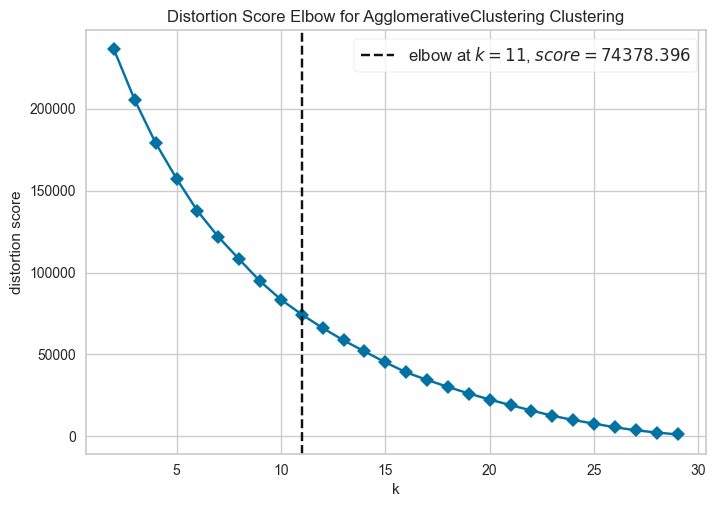

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(df)
# Finalize and render figure
visualizer.show()


In [80]:
y_AggClus = AgglomerativeClustering(n_clusters=11,linkage = 'average').fit(df)


In [81]:
sklearn.metrics.davies_bouldin_score(df, y_AggClus.labels_)

0.8082375391814057

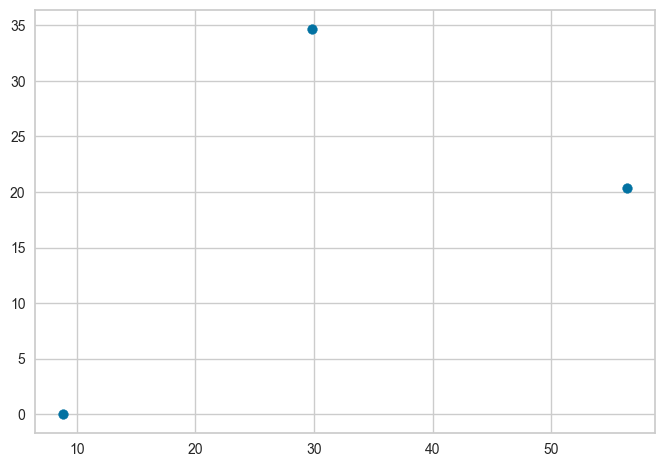

In [82]:
y_AggClus
filtered_label1=df[y_AggClus.labels_ == 0].iloc[:,:-1].values
filtered_label1
# # filtered_label0.to_numpy()[:,1]
# plt.scatter(filtered_label0[:,0])
# # Y = filtered_label0

plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
# plt.show()


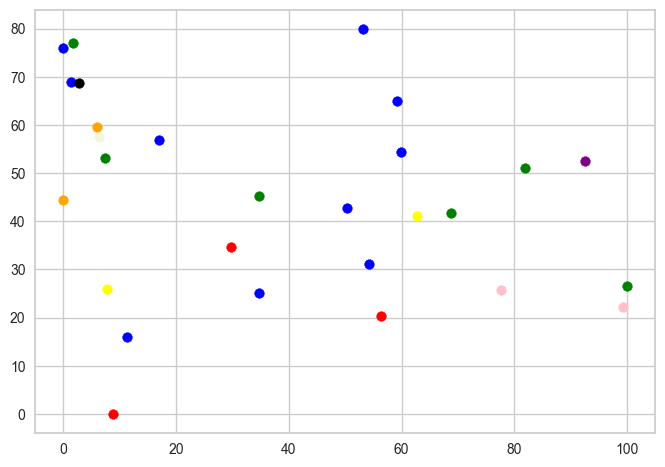

In [83]:
# colors=["red","green","blue","yellow","pink","black","orange","purple","beige","brown"]
for i in range (0,9):
    filtered_label1=df[y_AggClus.labels_ == i].iloc[:,:-1].values
    plt.scatter(filtered_label1[:,0] , filtered_label1[:,1], c = colors[i])


In [23]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=4, min_samples=10)
dbscan.fit(df)
# print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


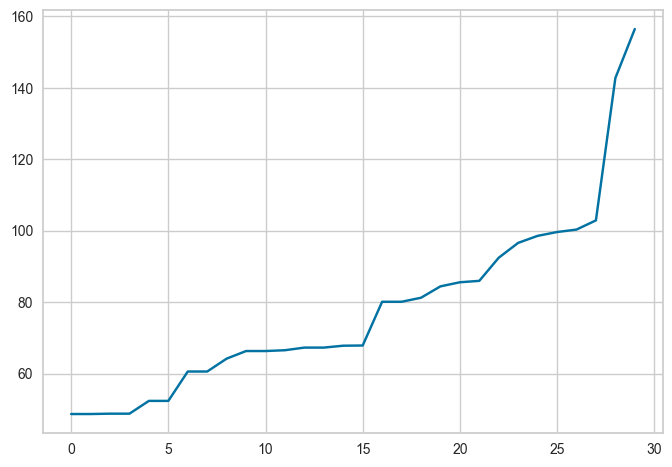

In [22]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors=26)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


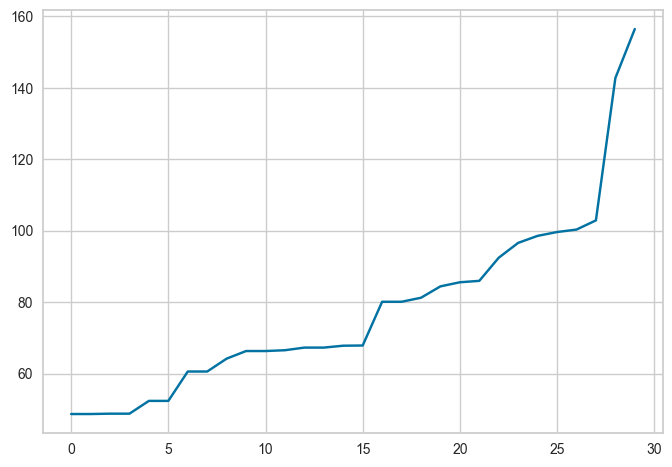

In [90]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(df)
distances, indices = nn_model.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Getting the User Assesment

In [108]:
user = pd.read_csv('/Users/namanjain/Downloads/user_data.csv')
User_point=user.to_numpy()
User_point

array([[19, 72, 66,  1, 95, 72, 40, 48, 23, 64, 80, 77, 60, 85, 15]])

Calculating distance of each centroid from the point.

In [99]:
def closest_cluster(lst):
    arr = np.array(lst)
    min_pos = np.argmin(arr)
    print(f"The Point belong to the cluster {min_pos}")
    return min_pos
    

In [100]:
def weightedL2(a, b, w):
    q = a-b
    return np.sqrt((w*q*q).sum())

In [101]:

distance=[]
w=[14,3,2,4,6,1,5,8,7,12,10,9,11,13,15]
for x in centroids:
    distance=np.append(distance,weightedL2(User_point,x,w))
ans=closest_cluster(distance)


The Point belong to the cluster 7


In [102]:

data_top = df[y_kmeans == ans].head() 
indexes=[]
for row in data_top.index:
    indexes=np.append(indexes,cities[row])
indexes




array(['Chennai', 'Pune', 'Ahmedabad', 'Thiruvananthapuram', 'Coimbatore'],
      dtype='<U32')

Within Cluster Distance

In [103]:
cluster_W=df[y_kmeans == ans].to_numpy()
wClust_dist=[]
recom_cities={}
for x in cluster_W:
    wClust_dist=np.append(wClust_dist,weightedL2(User_point,x,w))
for i in range(0,np.size(wClust_dist)):
    recom_cities[indexes[i]]=wClust_dist[i]
listt=sorted(recom_cities.items(), key=lambda x:x[1])
print(listt)


[('Coimbatore', 291.925728186798), ('Ahmedabad', 314.99552222891293), ('Chennai', 338.71236604887457), ('Pune', 355.89170618381615), ('Thiruvananthapuram', 371.39220898192)]


In [104]:
for i in range(len(listt)):
    print("Choice " + str(i+1) + " is " + listt[i][0])

Choice 1 is Coimbatore
Choice 2 is Ahmedabad
Choice 3 is Chennai
Choice 4 is Pune
Choice 5 is Thiruvananthapuram
